In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

np.random.seed(0)
X, y = make_classification(n_samples=500, n_features=3, n_informative=3, n_redundant=0,n_classes=5, n_clusters_per_class=1)

encoder = OneHotEncoder(sparse_output=False)
Y = encoder.fit_transform(y.reshape(-1, 1))


In [ ]:
import pandas as pd

df = pd.DataFrame(X)

df['label'] = y

df.head(20)

,0,1,2,label
0,2.005765,-0.702062,-0.910007,2
1,-0.369263,1.111683,1.098882,3
2,-0.513981,0.555242,-0.346022,4
3,1.136158,1.366234,1.948521,3
4,-0.446486,0.823755,0.811737,0
5,-1.490221,1.650733,1.363702,0
6,-1.049164,1.683291,1.070341,0
7,-0.012855,-1.941847,-1.419032,2
8,-1.286848,0.210886,0.946244,0
9,0.655620,-0.428763,-0.615762,2


In [ ]:
class MultiClassNeuralNetwork:
    def __init__(self, input_size=2, hidden_sizes=[16, 16, 16], output_size=5, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(input_size, hidden_sizes[0])
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1])
        self.W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2])
        self.W4 = np.random.randn(hidden_sizes[2], output_size)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)] + 1e-9)
        return np.sum(log_likelihood) / m

    def feedforward(self, X):
        self.z1 = np.dot(X, self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3)
        self.a3 = self.relu(self.z3)
        self.z4 = np.dot(self.a3, self.W4)
        self.output = self.softmax(self.z4)
        return self.output

    def backpropagation(self, X, Y):
        m = Y.shape[0]
        output_error = self.output - Y
        dW4 = np.dot(self.a3.T, output_error)

        dA3 = np.dot(output_error, self.W4.T) * self.relu_derivative(self.z3)
        dW3 = np.dot(self.a2.T, dA3)

        dA2 = np.dot(dA3, self.W3.T) * self.relu_derivative(self.z2)
        dW2 = np.dot(self.a1.T, dA2)

        dA1 = np.dot(dA2, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dA1)

        self.W4 -= self.learning_rate * dW4 / m
        self.W3 -= self.learning_rate * dW3 / m
        self.W2 -= self.learning_rate * dW2 / m
        self.W1 -= self.learning_rate * dW1 / m

    def train(self, X, Y, epochs=1000):
        losses = []
        for epoch in range(epochs):
            self.feedforward(X)
            loss = self.cross_entropy_loss(Y, self.output)
            self.backpropagation(X, Y)
            losses.append(loss)
        return losses


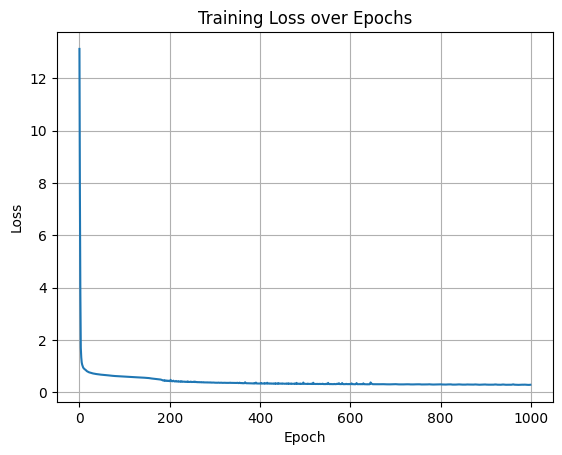

In [ ]:
nn = MultiClassNeuralNetwork(input_size= 3)
losses = nn.train(X, Y, epochs=1000)

plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_metrics(nn, X, Y_true):
    predictions = nn.feedforward(X)

    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(Y_true, axis=1)

    accuracy = accuracy_score(true_classes, predicted_classes)

    precision = precision_score(true_classes, predicted_classes, average=None)
    recall = recall_score(true_classes, predicted_classes, average=None)
    f1 = f1_score(true_classes, predicted_classes, average=None)


    precision_macro = precision_score(true_classes, predicted_classes, average='macro')
    recall_macro = recall_score(true_classes, predicted_classes, average='macro')
    f1_macro = f1_score(true_classes, predicted_classes, average='macro')

    print(f"✅ Final Training Accuracy: {accuracy * 100:.2f}%")
    print("\nPrecision for each class:", precision)
    print("Recall for each class:", recall)
    print("F1-Score for each class:", f1)
    print("\nMacro Average Precision:", precision_macro)
    print("Macro Average Recall:", recall_macro)
    print("Macro Average F1-Score:", f1_macro)

    return accuracy, precision, recall, f1, precision_macro, recall_macro, f1_macro


accuracy, precision, recall, f1, precision_macro, recall_macro, f1_macro = evaluate_metrics(nn, X, Y)


✅ Final Training Accuracy: 91.00%

Precision for each class: [0.87234043 0.94623656 0.96116505 0.89320388 0.87850467]
Recall for each class: [0.81188119 0.88       0.99       0.92929293 0.94      ]
F1-Score for each class: [0.84102564 0.9119171  0.97536946 0.91089109 0.90821256]

Macro Average Precision: 0.9102901179215463
Macro Average Recall: 0.9102348234823481
Macro Average F1-Score: 0.90948316941894



## 📘 Code Modifications and Implementation Notes

The neural network has been adapted for a **multi-class classification problem with five classes**. Below are the key modifications made:

- Used `make_classification` to generate synthetic data with 5 distinct classes.
- Labels were one-hot encoded using `OneHotEncoder` for multi-class processing.
- Neural network consists of **3 hidden layers** with ReLU activation.
- The output layer has **5 neurons** with **softmax** activation.
- The **cross-entropy loss function** is used to compute the training error.
- **Backpropagation** has been updated to support softmax + cross-entropy gradient flow.


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
Y_train = encoder.transform(y_train.reshape(-1, 1))
Y_test = encoder.transform(y_test.reshape(-1, 1))


model = MultiClassNeuralNetwork(input_size=3, hidden_sizes=[16, 16, 16], output_size=5, learning_rate=0.1)
model.train(X_train, Y_train, epochs=500)


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



## 📈 Results and Analysis

The confusion matrix above illustrates how well the model distinguishes between the five classes. Precision, recall, and F1-scores for each class are shown in the classification report.

**Observations:**
- Some confusion exists between specific classes, indicating room for improvement.
- Overall performance is reasonable for a simple feedforward network trained on synthetic data.
- Increasing the number of hidden units or training epochs may improve performance.
